# Python 基礎及應用

## Victor Gau

### 2018/02/24

# PIL 使用說明

In [124]:
# 載入套件
# 使用 PIL 來處理影像

from PIL import Image

## 讀取及顯示圖片

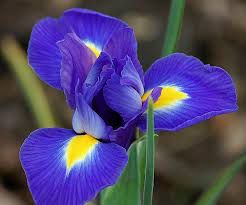

In [125]:
# 讀出第一章圖
img1 = Image.open("images/iris.jpg")
img1

## 檢視圖片資訊

In [126]:
img1.size

(246, 205)

In [127]:
# mode 有哪些請參考: http://pillow.readthedocs.io/en/latest/handbook/writing-your-own-file-decoder.html
img1.mode

'RGB'

In [128]:
img1.format

'JPEG'

## 色層的分離 (split) 及合併 (merge)

In [129]:
# 分離色層
r, g, b = img1.split()

In [130]:
r.mode

'L'

In [131]:
k = Image.new("L", img1.size,"black")

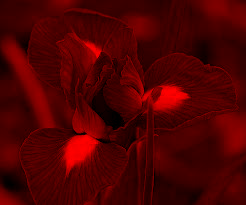

In [132]:
img_r = Image.merge('RGB', (r, k, k))
img_r

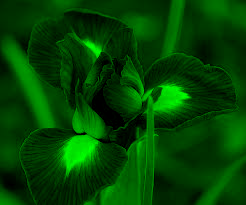

In [133]:
img_g = Image.merge('RGB', (k, g, k))
img_g

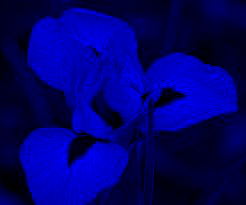

In [134]:
img_b = Image.merge('RGB', (k, k, b))
img_b

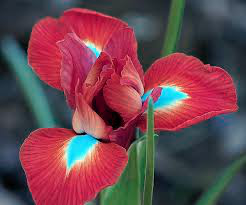

In [135]:
# 合併色層
img_m = Image.merge("RGB", (b, g, r)) # 把 r, b 的色層互調
img_m

## 旋轉圖片 (rotate)

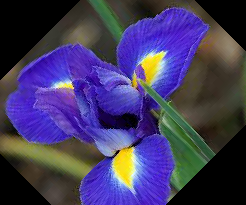

In [136]:
# Rotate 45 degree
img1.rotate(45)

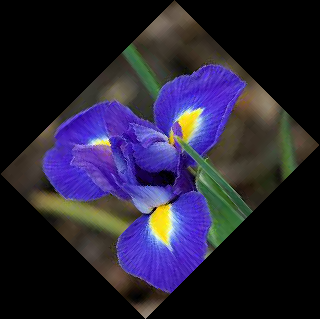

In [137]:
# To rotate:
img1.rotate(45, expand=True)

## 翻轉圖片 (transpose)

### 有五種轉法：

* 左右翻轉：Image.FLIP_LEFT_RIGHT
* 上下翻轉：Image.FLIP_TOP_BOTTOM
* 轉 90 度：Image.ROTATE_90
* 轉 180 度：Image.ROTATE_180
* 轉 270 度：Image.ROTATE_270

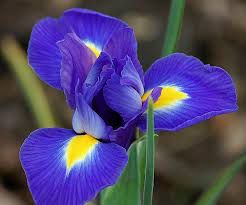

In [144]:
img1

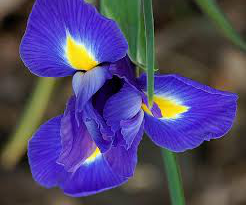

In [145]:
img1.transpose(Image.FLIP_TOP_BOTTOM)

## 縮放尺寸 (resize)

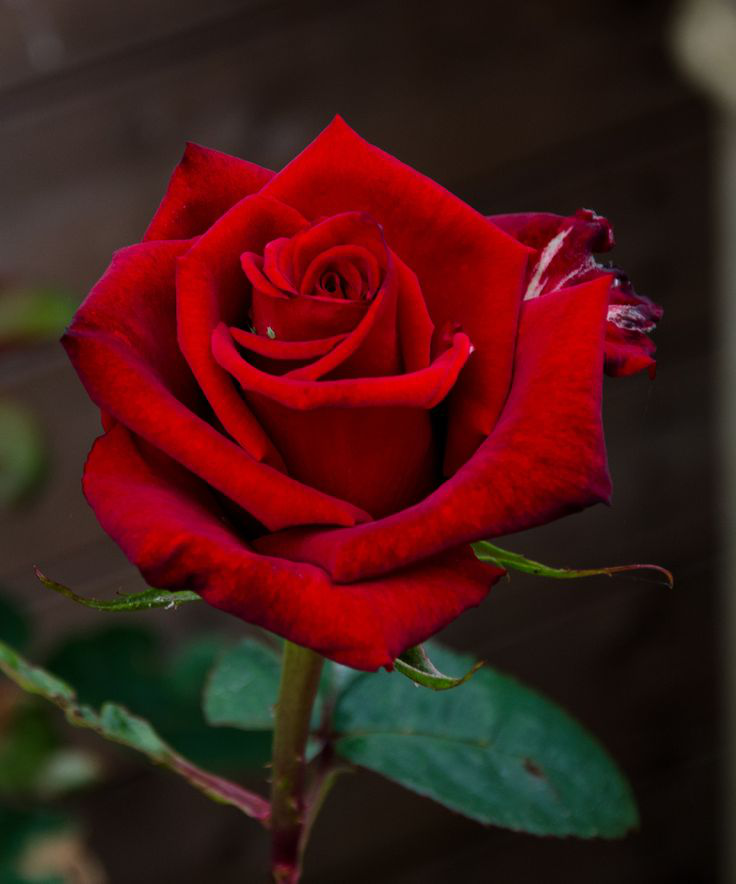

In [138]:
# 讀出第二張圖
img2 = Image.open("images/rose.jpg")
img2

In [139]:
img2.size

(736, 884)

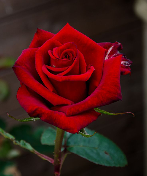

In [140]:
width = int(img2.size[0]/5)
height = int(img2.size[1]/5)
img2.resize((width, height))

## 製作縮圖 (thumbnail)

In [71]:
img1.size

(246, 205)

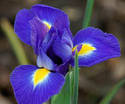

In [72]:
size = 125, 150
img1.thumbnail(size, Image.ANTIALIAS)
img1

In [73]:
img1.size

(125, 104)

## 貼圖 (paste)

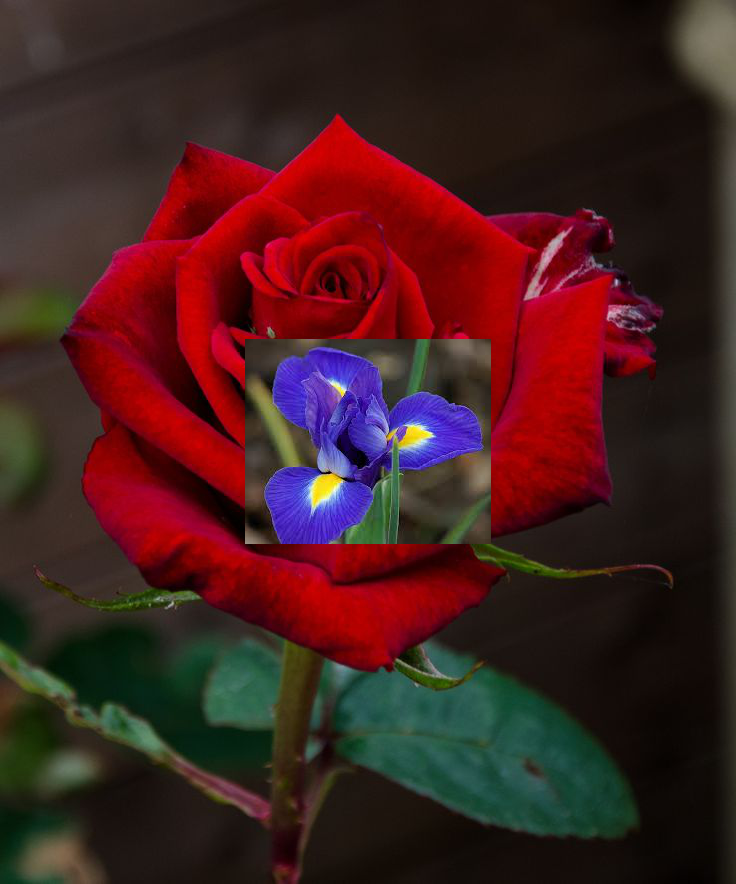

In [141]:
img2.paste(img1,((img2.size[0] - img1.size[0])//2,(img2.size[1] - img1.size[1])//2))
img2

## 存檔及轉檔

In [143]:
# 存檔
img2.save("images/image2.jpg","JPEG")

## 裁切圖片

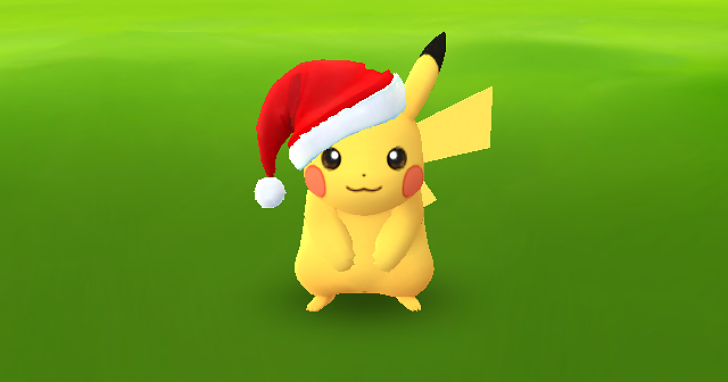

In [146]:
img4 = Image.open("images/pikachu.png")
img4

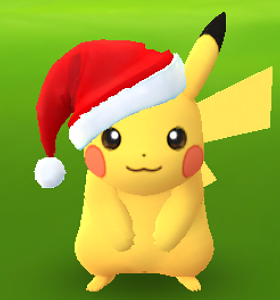

In [147]:
img5 = img4.crop((220, 20, 500, 320))
img5

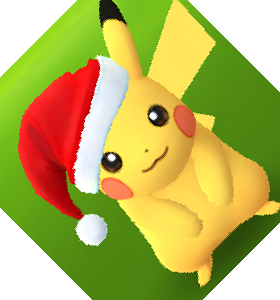

In [148]:
img5.rotate(45)

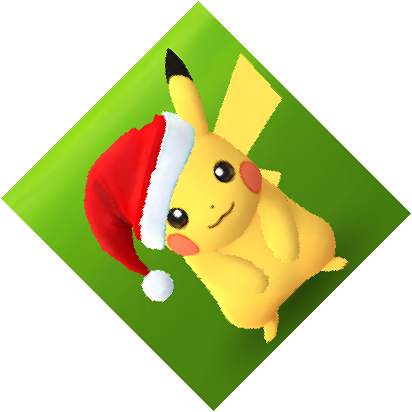

In [149]:
img5.rotate(45, expand=True)

## 也可以使用 Requests 直接抓網路上的圖片下來處理

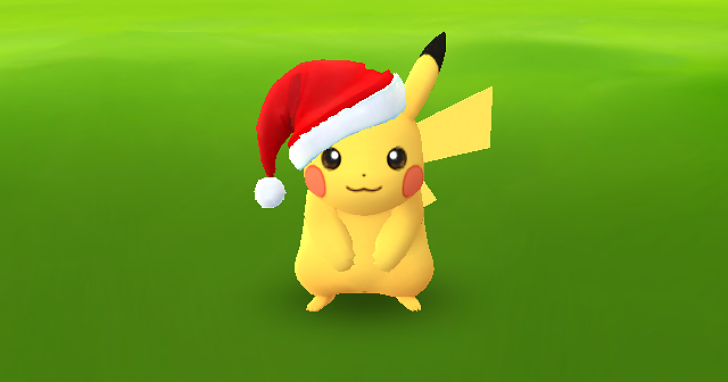

In [14]:
# 使用 Requests 來抓取網路資料

import requests
from io import BytesIO

# 直接從網路抓取圖片
# https://cdn1-techbang.pixfs.net/system/excerpt_images/48113/original/5fb46b0dc020166fad9203d5ebb73313.png
r = requests.get('https://cdn1-techbang.pixfs.net/system/excerpt_images/48113/original/5fb46b0dc020166fad9203d5ebb73313.png')
img = Image.open(BytesIO(r.content))
img